In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

In [2]:
dataset=pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Pre-prunning step- dropping columns which are not essential for objective in the beginning 
dataset=dataset.drop(['RowNumber','CustomerId','Surname'], axis=1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check duplicate customer
dataset.duplicated().sum()

0

In [5]:
# Check missing data
dataset.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
# Check information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Encoding - to handle char variable

In [7]:
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
# One hot encoder (more than two unique observations - first create dummy variable)
dataset=pd.get_dummies(dataset,columns=['Geography'])
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [9]:
# Drop one dummy variable as formula is (n-1)
dataset=dataset.drop(['Geography_France'],axis=1)

In [10]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,True


In [11]:
dataset['Gender'].value_counts()  

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
# Label Encoder
dataset['Gender']=dataset['Gender'].astype('category')
dataset['Gender']=dataset['Gender'].cat.codes

In [13]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [14]:
# Splitting the data into independent and dependent variable
x=dataset.drop(['Exited'],axis=1)
y=dataset['Exited']

In [15]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [18]:
# Clearly imbalance data
2037/10000*100

20.369999999999997

In [19]:
# imbalance tretment required however we use stratify to balance training and test dataset
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print(y_smote.value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
1    7963
0    7963
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=101, stratify=y)

In [21]:
# Data leakage problem - perform feature scaling on training dataset only, do not perform on testing dataset
## 1) if we have train and test data separately, we have to hanle missing data, feature scaling, outlier treatment separately


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

<Axes: >

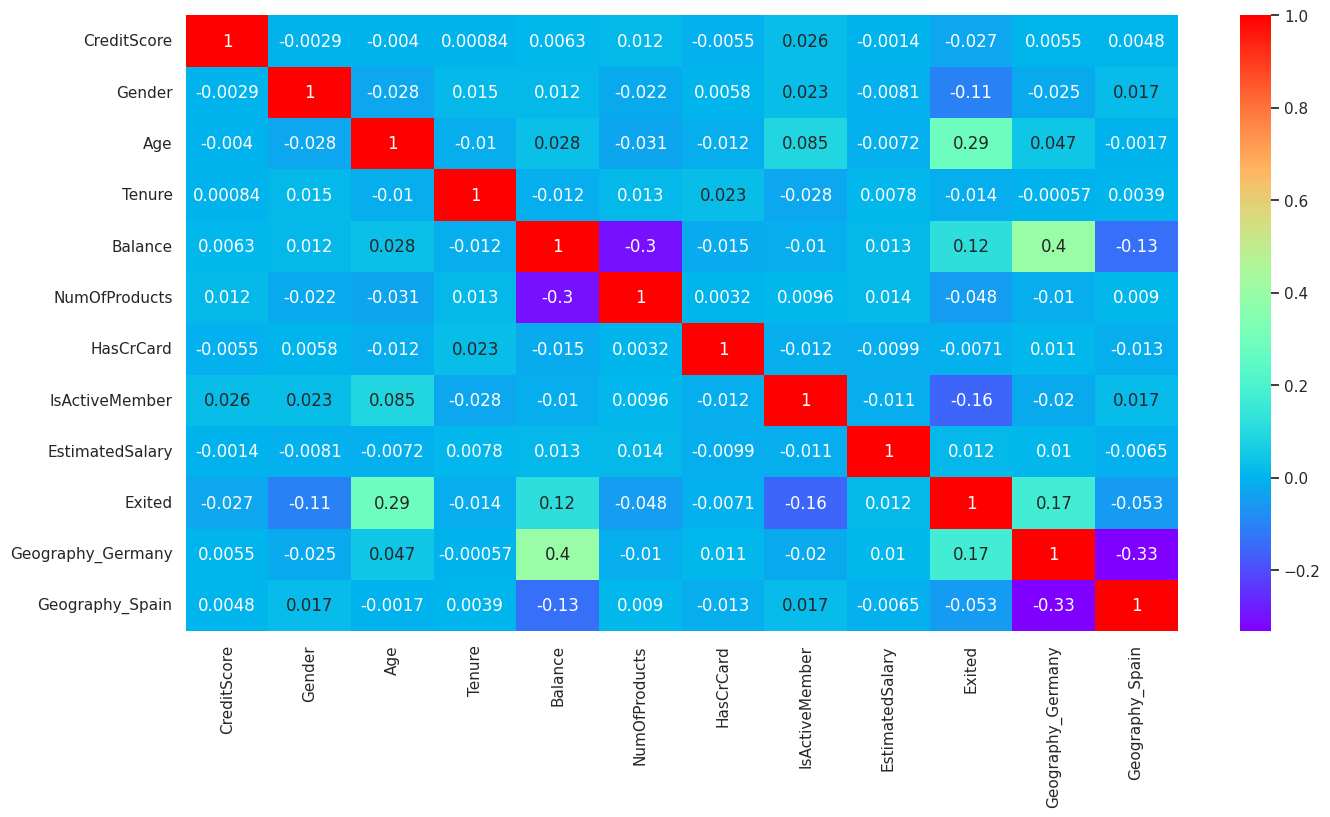

In [22]:
# correlation
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')

In [23]:
#import dtale
#dtale.show(dataset)

In [24]:
pd.DataFrame(y_train).value_counts()

Exited
0         6370
1         1630
Name: count, dtype: int64

<Axes: xlabel='Exited'>

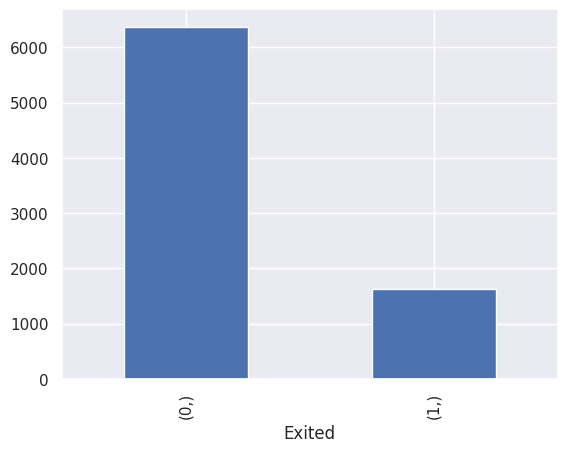

In [25]:
pd.DataFrame(y_train).value_counts().plot(kind='bar')

In [26]:
pd.DataFrame(y_test).value_counts()

Exited
0         1593
1          407
Name: count, dtype: int64

In [ ]:
def draw_histogram(dataset, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(16,10))
    for i , var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        dataset[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name + "Distribution")
    fig.tight_layout()
    plt.show()
    
draw_histogram(dataset,x,5,3)

# Model Building

## Model 1 : AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [28]:
y_pred_train_ada=ada.predict(x_train)
y_pred_test_ada= ada.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [30]:
print(confusion_matrix(y_train, y_pred_train_ada))
print()
print(confusion_matrix(y_test, y_pred_test_ada))

[[6087  283]
 [ 822  808]]

[[1517   76]
 [ 234  173]]


In [31]:
print(classification_report(y_train, y_pred_train_ada))
print()
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6370
           1       0.74      0.50      0.59      1630

    accuracy                           0.86      8000
   macro avg       0.81      0.73      0.76      8000
weighted avg       0.85      0.86      0.85      8000


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.69      0.43      0.53       407

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [32]:
print(accuracy_score(y_train, y_pred_train_ada))
print()
print(accuracy_score(y_test, y_pred_test_ada))

0.861875

0.845


## Model 2 : Gradient Boosting Algorithm

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
gdm=GradientBoostingClassifier()
gdm.fit(x_train,y_train)

GradientBoostingClassifier()

In [35]:
y_pred_train_gdm=gdm.predict(x_train)
y_pred_test_gdm= gdm.predict(x_test)

In [36]:
print(classification_report(y_train, y_pred_train_gdm))
print()
print(classification_report(y_test, y_pred_test_gdm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.81      0.52      0.63      1630

    accuracy                           0.88      8000
   macro avg       0.85      0.74      0.78      8000
weighted avg       0.87      0.88      0.87      8000


              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.42      0.54       407

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [37]:
print(accuracy_score(y_train, y_pred_train_gdm))
print()
print(accuracy_score(y_test, y_pred_test_gdm))

0.87675

0.856


### Model 3 : XGBoost classifier

In [42]:
! pip install xgboost

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred_train_xgb=xgb.predict(x_train)
y_pred_test_xgb= xgb.predict(x_test)

In [41]:
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6370
           1       0.97      0.82      0.89      1630

    accuracy                           0.96      8000
   macro avg       0.96      0.91      0.93      8000
weighted avg       0.96      0.96      0.96      8000


              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1593
           1       0.68      0.42      0.52       407

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



In [42]:
print(accuracy_score(y_train, y_pred_train_xgb))
print()
print(accuracy_score(y_test, y_pred_test_xgb))

0.95775

0.8415


In [43]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
print(training_accuracy.mean())

0.85375


### Model 4 : Bagging Classifier

In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
bagging=BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier()

In [46]:
y_pred_train_bagging=bagging.predict(x_train)
y_pred_test_bagging= bagging.predict(x_test)

In [47]:
print(classification_report(y_train, y_pred_train_bagging))
print()
print(classification_report(y_test, y_pred_test_bagging))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6370
           1       0.99      0.93      0.96      1630

    accuracy                           0.98      8000
   macro avg       0.99      0.96      0.97      8000
weighted avg       0.98      0.98      0.98      8000


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1593
           1       0.67      0.42      0.51       407

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.71      2000
weighted avg       0.82      0.84      0.82      2000



In [48]:
print(accuracy_score(y_train, y_pred_train_bagging))
print()
print(accuracy_score(y_test, y_pred_test_bagging))

0.98375

0.8395


## Model 5 : Random Forest Classification

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfm=RandomForestClassifier()
rfm.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred_train_rfm=rfm.predict(x_train)
y_pred_test_rfm= rfm.predict(x_test)

In [52]:
print(classification_report(y_train, y_pred_train_rfm))
print()
print(classification_report(y_test, y_pred_test_rfm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [56]:
print(accuracy_score(y_train, y_pred_train_rfm))
print()
print(accuracy_score(y_test, y_pred_test_rfm))

1.0

0.854


In [57]:
# boosting is for high bias problem
# bagging is for high variance problem

## Model 6 : KNN 

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
y_train

7083    0
5030    0
1333    0
845     0
1922    1
       ..
6339    0
5067    1
1777    0
6608    0
561     0
Name: Exited, Length: 8000, dtype: int64

In [60]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))

In [61]:
error_rate

[0.3265,
 0.234,
 0.272,
 0.2255,
 0.2385,
 0.2155,
 0.226,
 0.212,
 0.223,
 0.2115,
 0.216,
 0.2075,
 0.211,
 0.207,
 0.211,
 0.2085,
 0.2075,
 0.2065,
 0.207,
 0.206,
 0.2065,
 0.2055,
 0.2055,
 0.205,
 0.207,
 0.207,
 0.2065,
 0.206,
 0.207]

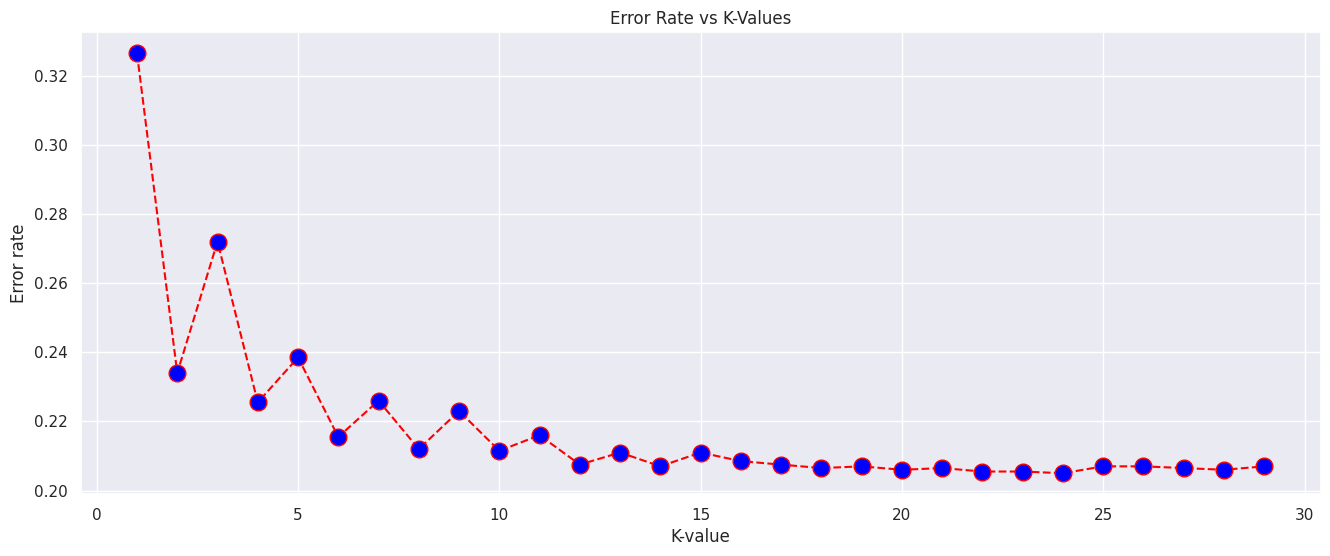

In [62]:
plt.figure(figsize=(16,6))
plt.plot(range(1,30), error_rate, color='red', linestyle='dashed', marker='o', markersize=12,
        markerfacecolor='blue')
plt.title("Error Rate vs K-Values")
plt.xlabel("K-value")
plt.ylabel("Error rate")
plt.show()

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [64]:
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [65]:
print(classification_report(y_train, y_pred_train_knn))
print()
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6370
           1       0.67      0.02      0.04      1630

    accuracy                           0.80      8000
   macro avg       0.73      0.51      0.46      8000
weighted avg       0.77      0.80      0.71      8000


              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1593
           1       0.35      0.02      0.03       407

    accuracy                           0.79      2000
   macro avg       0.57      0.50      0.46      2000
weighted avg       0.71      0.79      0.71      2000



In [66]:
print(accuracy_score(y_train, y_pred_train_knn))
print()
print(accuracy_score(y_test, y_pred_test_knn))

0.79825

0.7935
